In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from sklearn.ensemble import  RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import (
    r2_score, mean_squared_error, mean_absolute_error,
    confusion_matrix, ConfusionMatrixDisplay, classification_report
)
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")


In [2]:
# Read in the csv data for years 1999-2023 for PM2.5 concentration
df1 = pd.read_csv("../ad_viz_plotval_data.csv" , usecols = ["Daily Mean PM2.5 Concentration", "Date", "UNITS", "DAILY_AQI_VALUE", "SITE_LATITUDE","SITE_LONGITUDE"])
df2 = pd.read_csv("../ad_viz_plotval_data (1).csv", usecols = ["Daily Max 8-hour Ozone Concentration", "Date", "UNITS", "DAILY_AQI_VALUE", "SITE_LATITUDE","SITE_LONGITUDE"])
df3 = pd.read_csv("../ad_viz_plotval_data (2).csv", usecols = ["Daily Max 1-hour NO2 Concentration", "Date", "UNITS", "DAILY_AQI_VALUE", "SITE_LATITUDE","SITE_LONGITUDE"])
df4 = pd.read_csv("../ad_viz_plotval_data (3).csv", usecols = ["Daily Max 1-hour SO2 Concentration", "Date", "UNITS", "DAILY_AQI_VALUE", "SITE_LATITUDE","SITE_LONGITUDE"])

In [3]:
df = pd.merge(df1, df2,  on = ('Date', "SITE_LATITUDE","SITE_LONGITUDE") , how = 'inner')
df = pd.merge(df, df3,  on = ('Date', "SITE_LATITUDE","SITE_LONGITUDE") , how = 'inner')
df = pd.merge(df, df4,  on = ('Date', "SITE_LATITUDE","SITE_LONGITUDE") , how = 'inner')

# Data Exploration

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11647 entries, 0 to 11646
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Date                                  11647 non-null  object 
 1   Daily Mean PM2.5 Concentration        11647 non-null  float64
 2   UNITS_x                               11647 non-null  object 
 3   DAILY_AQI_VALUE_x                     11647 non-null  int64  
 4   SITE_LATITUDE                         11647 non-null  float64
 5   SITE_LONGITUDE                        11647 non-null  float64
 6   Daily Max 8-hour Ozone Concentration  11647 non-null  float64
 7   UNITS_y                               11647 non-null  object 
 8   DAILY_AQI_VALUE_y                     11647 non-null  int64  
 9   Daily Max 1-hour NO2 Concentration    11647 non-null  float64
 10  UNITS_x                               11647 non-null  object 
 11  DAILY_AQI_VALUE

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Daily Mean PM2.5 Concentration,11647.0,9.314227,6.440350e+00,-2.90000,4.90000,7.50000,11.80000,81.00000
DAILY_AQI_VALUE_x,11647.0,35.857216,1.990873e+01,0.00000,20.00000,31.00000,49.00000,164.00000
SITE_LATITUDE,11647.0,40.736140,5.400357e-12,40.73614,40.73614,40.73614,40.73614,40.73614
SITE_LONGITUDE,11647.0,-73.821530,1.375670e-11,-73.82153,-73.82153,-73.82153,-73.82153,-73.82153
Daily Max 8-hour Ozone Concentration,11647.0,0.034074,1.508085e-02,0.00000,0.02400,0.03300,0.04300,0.10400
DAILY_AQI_VALUE_y,11647.0,33.729716,2.051615e+01,0.00000,22.00000,31.00000,40.00000,197.00000
Daily Max 1-hour NO2 Concentration,11647.0,34.375539,1.377631e+01,2.80000,24.10000,34.00000,43.00000,124.00000
DAILY_AQI_VALUE_x,11647.0,32.270542,1.327881e+01,2.00000,23.00000,32.00000,41.00000,105.00000
Daily Max 1-hour SO2 Concentration,11647.0,6.045686,8.076710e+00,-0.10000,1.00000,3.00000,8.00000,247.00000
DAILY_AQI_VALUE_y,11647.0,8.053147,1.120733e+01,0.00000,1.00000,4.00000,11.00000,176.00000


In [6]:
pd.set_option('display.float_format', '{:.2f}'.format)

In [7]:
df.duplicated().sum()

136

In [8]:
df = df.drop_duplicates()

In [9]:
# Standarise column names and make them more computer readable
df.columns = df.columns.str.replace(" ", "_")
df.columns = df.columns.str.replace(".", "_")
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace("-", "_")

# Data Exploration

In [10]:
# Inspect the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11511 entries, 0 to 11646
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   date                                  11511 non-null  object 
 1   daily_mean_pm2_5_concentration        11511 non-null  float64
 2   units_x                               11511 non-null  object 
 3   daily_aqi_value_x                     11511 non-null  int64  
 4   site_latitude                         11511 non-null  float64
 5   site_longitude                        11511 non-null  float64
 6   daily_max_8_hour_ozone_concentration  11511 non-null  float64
 7   units_y                               11511 non-null  object 
 8   daily_aqi_value_y                     11511 non-null  int64  
 9   daily_max_1_hour_no2_concentration    11511 non-null  float64
 10  units_x                               11511 non-null  object 
 11  daily_aqi_value

In [11]:
# Check for missing values
df.isnull().sum()

date                                    0
daily_mean_pm2_5_concentration          0
units_x                                 0
daily_aqi_value_x                       0
site_latitude                           0
site_longitude                          0
daily_max_8_hour_ozone_concentration    0
units_y                                 0
daily_aqi_value_y                       0
daily_max_1_hour_no2_concentration      0
units_x                                 0
daily_aqi_value_x                       0
daily_max_1_hour_so2_concentration      0
units_y                                 0
daily_aqi_value_y                       0
dtype: int64

In [12]:
# Check for duplicates
df.duplicated().sum()

0

In [13]:
sum(df.duplicated())

0

In [14]:
# Inspect the first 5 rows
df.head()

,date,daily_mean_pm2_5_concentration,units_x,daily_aqi_value_x,site_latitude,site_longitude,daily_max_8_hour_ozone_concentration,units_y,daily_aqi_value_y,daily_max_1_hour_no2_concentration,units_x,daily_aqi_value_x,daily_max_1_hour_so2_concentration,units_y,daily_aqi_value_y
0,12/21/2006,17.70,ug/m3 LC,63,40.74,-73.82,0.00,ppm,2,44.00,ppb,42,27.00,ppb,39
1,12/21/2006,17.60,ug/m3 LC,63,40.74,-73.82,0.00,ppm,2,44.00,ppb,42,27.00,ppb,39
2,12/22/2006,10.30,ug/m3 LC,43,40.74,-73.82,0.03,ppm,23,41.00,ppb,39,14.00,ppb,20
3,12/22/2006,10.50,ug/m3 LC,44,40.74,-73.82,0.03,ppm,23,41.00,ppb,39,14.00,ppb,20
4,12/22/2006,9.60,ug/m3 LC,40,40.74,-73.82,0.03,ppm,23,41.00,ppb,39,14.00,ppb,20


In [15]:
# Standarize column names and make them more computer readable
df.columns = df.columns.str.replace(" ", "_")
df.columns = df.columns.str.replace(".", "_")
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace("-", "_")

In [16]:
# Inspect all the data
df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
date,11511,6688,09/27/2007,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
daily_mean_pm2_5_concentration,11511.00,NaN,NaN,NaN,9.32,6.44,-2.90,4.90,7.50,11.80,81.00
units_x,11511,1,ug/m3 LC,11511,NaN,NaN,NaN,NaN,NaN,NaN,NaN
daily_aqi_value_x,11511.00,NaN,NaN,NaN,35.88,19.92,0.00,20.00,31.00,49.00,164.00
site_latitude,11511.00,NaN,NaN,NaN,40.74,0.00,40.74,40.74,40.74,40.74,40.74
site_longitude,11511.00,NaN,NaN,NaN,-73.82,0.00,-73.82,-73.82,-73.82,-73.82,-73.82
daily_max_8_hour_ozone_concentration,11511.00,NaN,NaN,NaN,0.03,0.02,0.00,0.02,0.03,0.04,0.10
units_y,11511,1,ppm,11511,NaN,NaN,NaN,NaN,NaN,NaN,NaN
daily_aqi_value_y,11511.00,NaN,NaN,NaN,33.73,20.51,0.00,22.00,31.00,40.00,197.00
daily_max_1_hour_no2_concentration,11511.00,NaN,NaN,NaN,34.37,13.80,2.80,24.00,34.00,43.00,124.00


In [17]:
# Change date format to datetime
df["date"] = pd.to_datetime(df["date"], format="%m/%d/%Y")
# Extract useful features from the date column
df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.month
df["day"] = df["date"].dt.day

 Since we are the data is linear we sort the data by date

In [18]:
df = df.sort_values("date")

# Create a sample scatter plots of PM2.5 concentration and AQI value against date

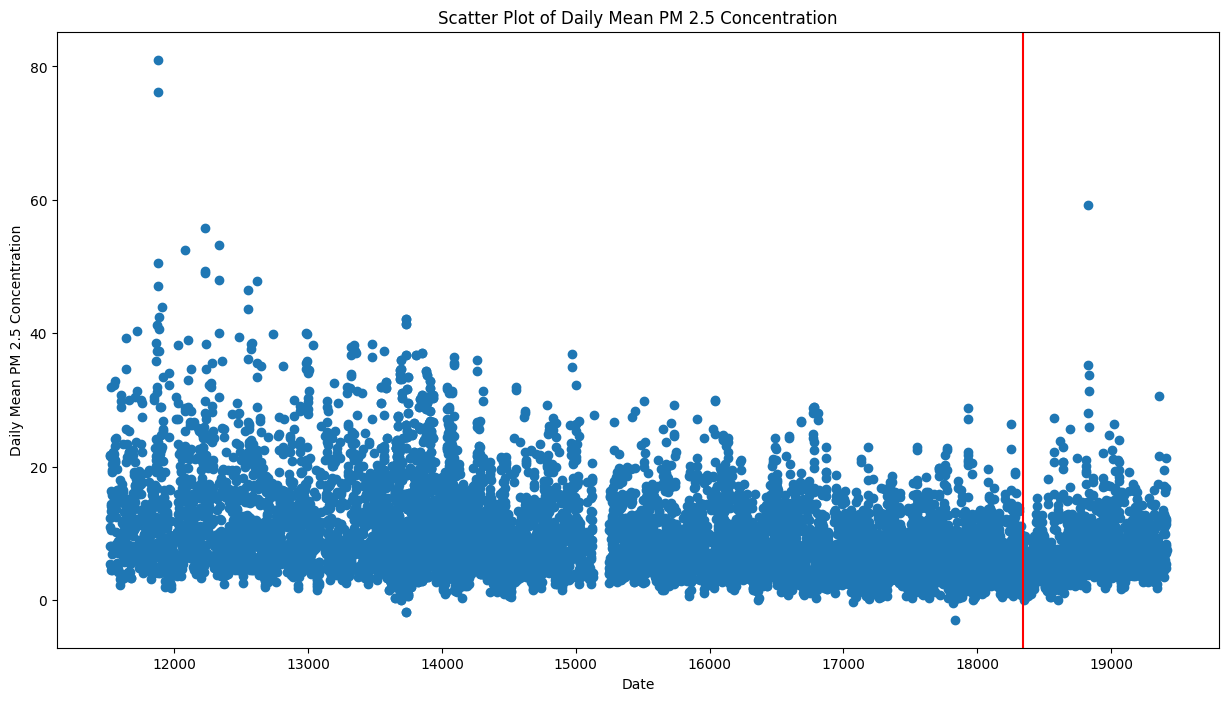

In [19]:

x = mdates.date2num(df["date"]) # convert dates to numerical format
y = df["daily_mean_pm2_5_concentration"]

plt.figure(figsize=(15, 8))

# create scatter plot
plt.scatter(x, y)

# set x-axis limits
#min_date = mdates.date2num(pd.to_datetime('2000-01-01'))
#max_date = mdates.date2num(pd.to_datetime('2022-12-31'))
#plt.xlim(min_date, max_date)



# add labels and title
plt.xlabel("Date")
plt.ylabel("Daily Mean PM 2.5 Concentration")
plt.title("Scatter Plot of Daily Mean PM 2.5 Concentration")

# add a vertical line on a specific date, NYC Pause
specific_date = pd.to_datetime("2020-03-22")
plt.axvline(x=mdates.date2num(specific_date), color="red")


plt.show()

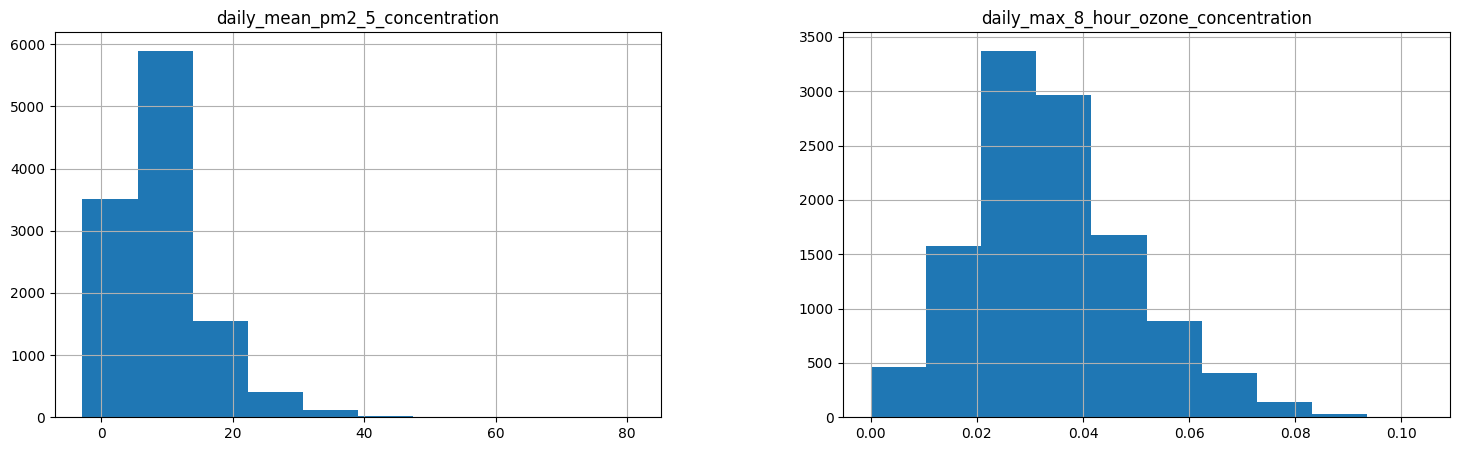

In [20]:
df.hist(['daily_mean_pm2_5_concentration','daily_max_8_hour_ozone_concentration'], figsize=(18,5));

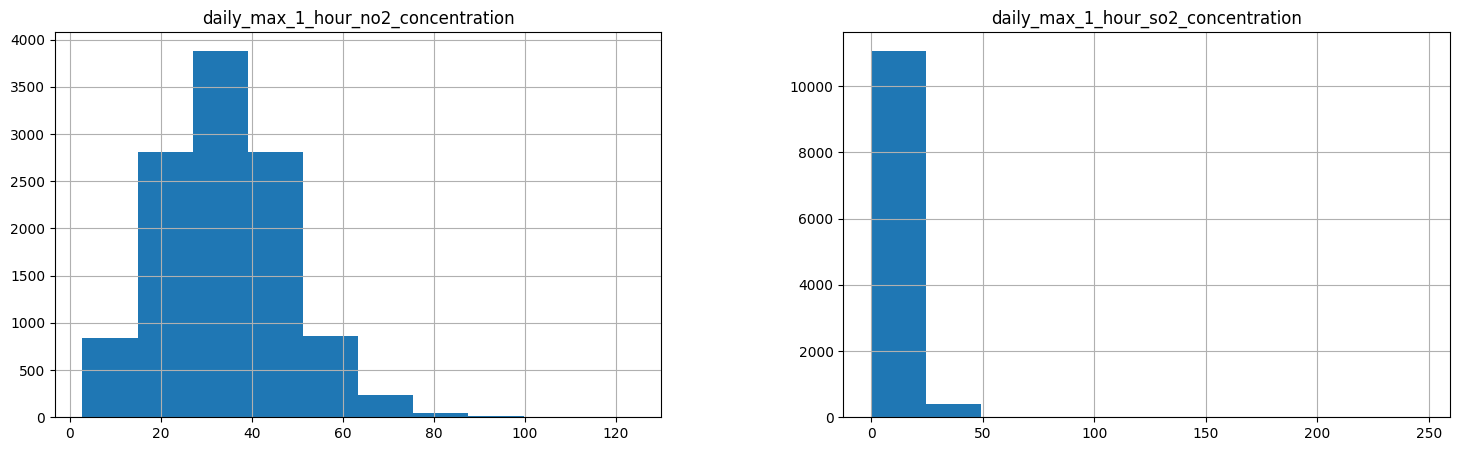

In [21]:
df.hist(['daily_max_1_hour_no2_concentration','daily_max_1_hour_so2_concentration'], figsize=(18,5));

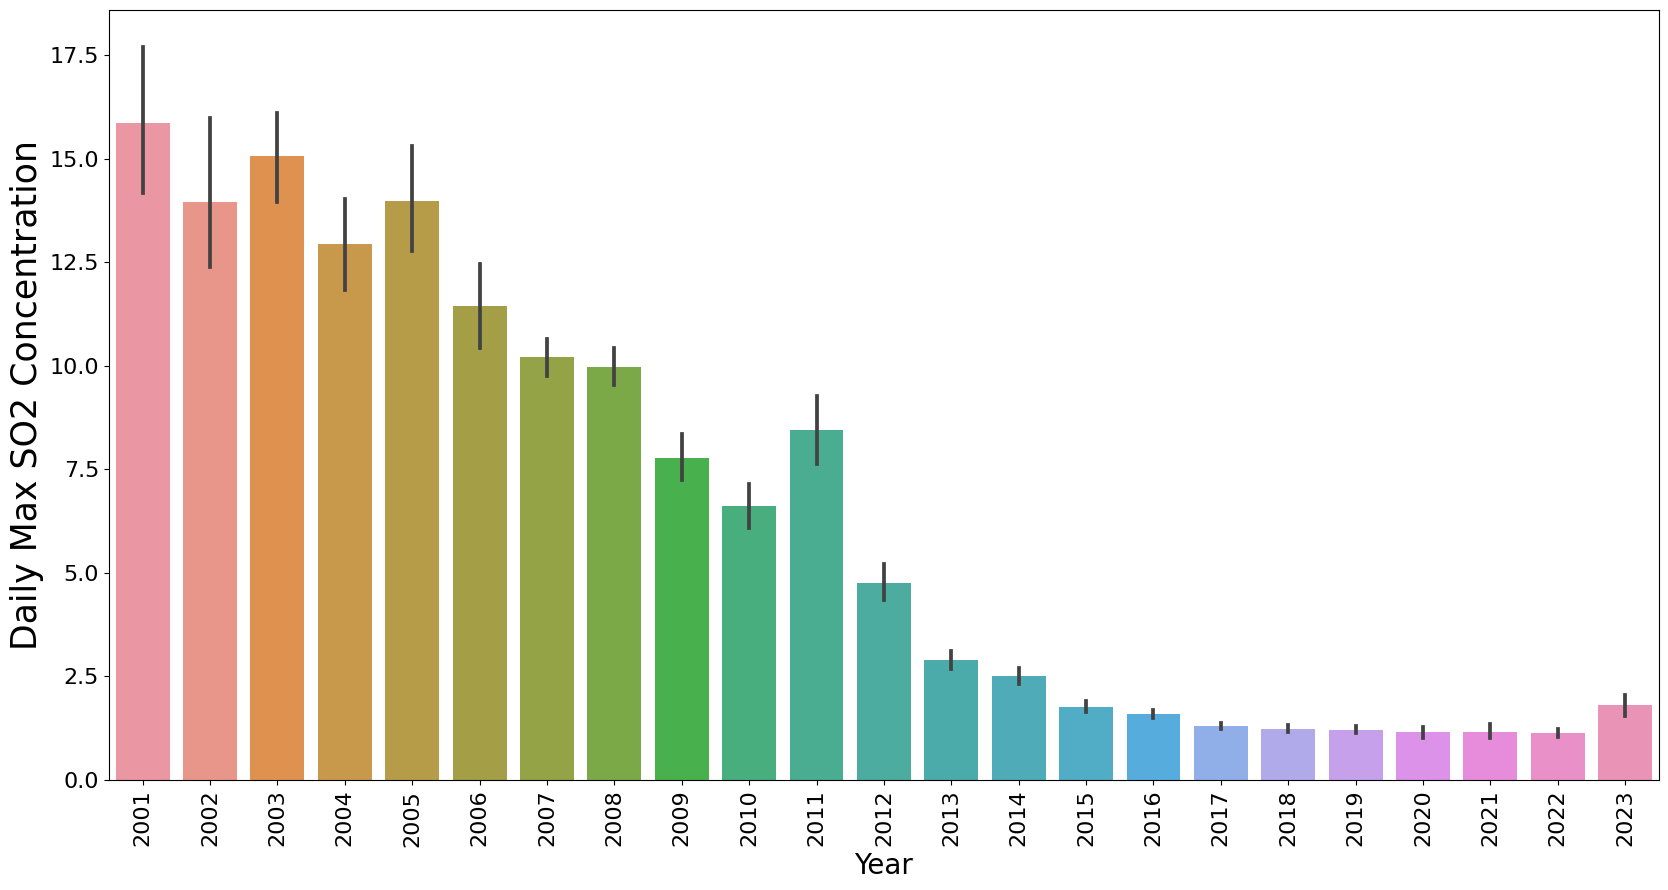

In [22]:

plt.figure(figsize=(20,10))
plt.xticks(rotation=90, fontsize=16)
plt.yticks(fontsize=16)
sns.barplot(x="year", y="daily_max_1_hour_so2_concentration", data=df)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Daily Max SO2 Concentration', fontsize=25)
plt.show()


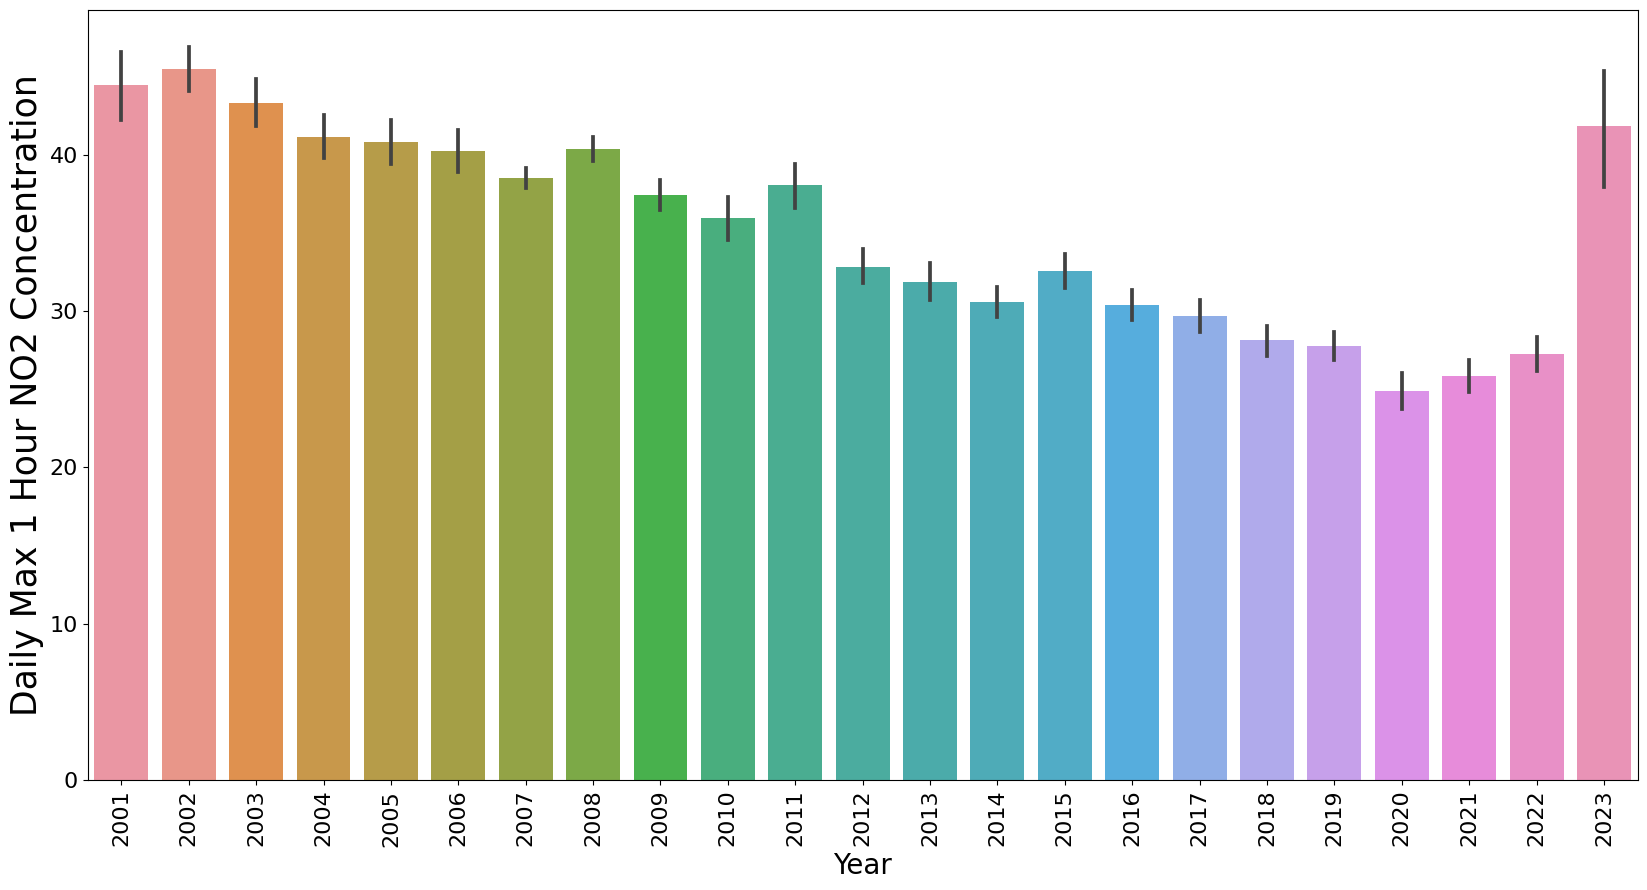

In [23]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90, fontsize=16)
plt.yticks(fontsize=16)
sns.barplot(x="year", y="daily_max_1_hour_no2_concentration", data=df)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Daily Max 1 Hour NO2 Concentration', fontsize=25)
plt.show()

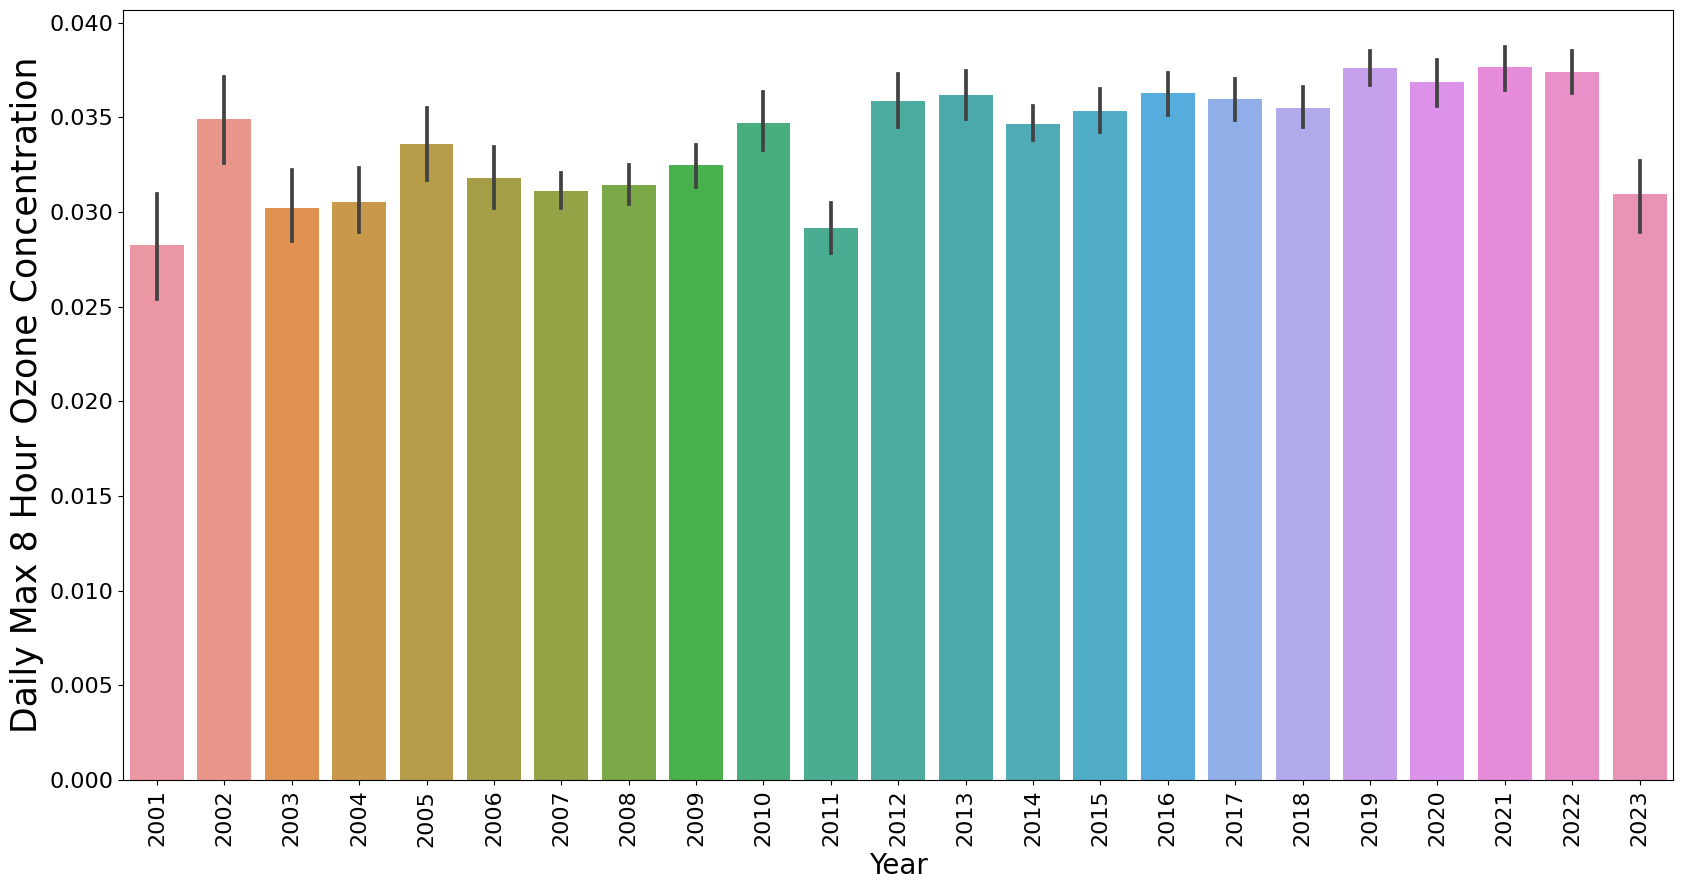

In [24]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90, fontsize=16)
plt.yticks(fontsize=16)
sns.barplot(x="year", y="daily_max_8_hour_ozone_concentration", data=df)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Daily Max 8 Hour Ozone Concentration', fontsize=25)
plt.show()


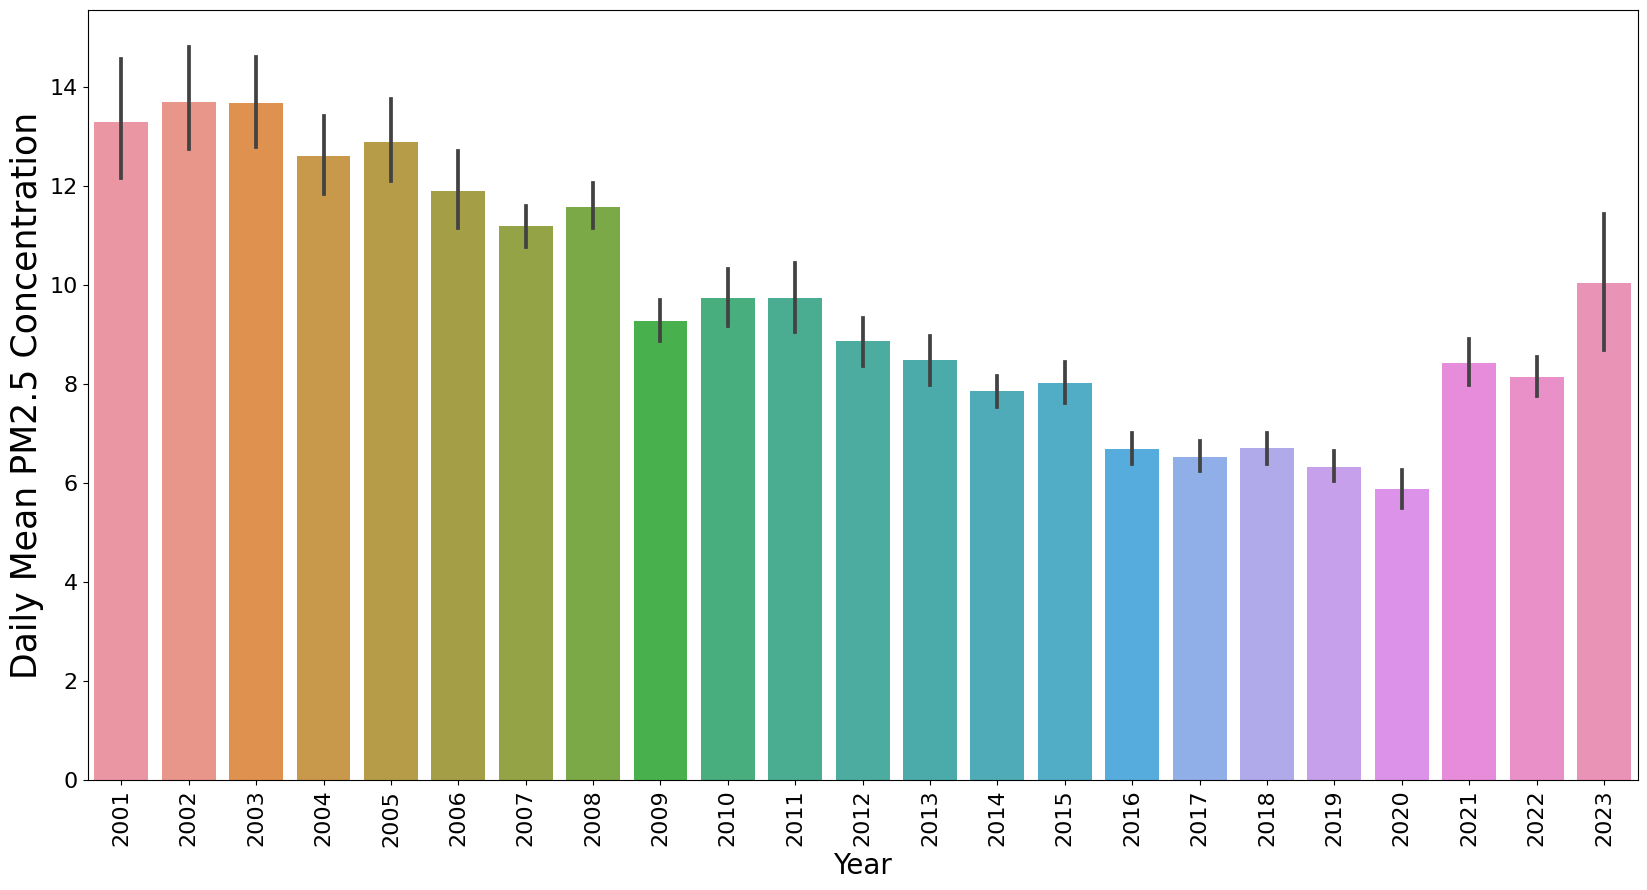

In [25]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90, fontsize=16)
plt.yticks(fontsize=16)
sns.barplot(x="year", y="daily_mean_pm2_5_concentration", data=df)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Daily Mean PM2.5 Concentration', fontsize=25)
plt.show()


In [26]:
df.set_index('date', inplace=True)

In [27]:
# get average AQI for each column and assign to one main AQI columns

# calculate averages
df['daily_aqi_value'] = df[['daily_aqi_value_x', 'daily_aqi_value_y', 'daily_aqi_value_x', "daily_aqi_value_y"]].mean(axis=1)
print(df['daily_aqi_value'])

date
2001-07-15   26.25
2001-07-16   37.00
2001-07-18   45.00
2001-07-18   45.00
2001-07-19   33.25
              ... 
2023-02-24   22.50
2023-02-25   22.25
2023-02-26   35.50
2023-02-26   33.25
2023-02-27   24.00
Name: daily_aqi_value, Length: 11511, dtype: float64


 Description of Variables   
   
    date                              7964  Qualitative. Rejected. We have extracted useful features from the date column
    source                               2  Categorical. Selected
    site_id                              6  Categorical. Rejected. Same as site_name
    poc                                  5  Categorical. Selected
    daily_mean_pm2_5_concentration     430  Quantitative. Selected
    units                                1  Categorical. Rejected. Same for all columns
    daily_aqi_value                    141  Quantitative. Selected. Our Target variable
    site_name                            6  Categorical. Selected
    daily_obs_count                      1  Quantitative. Rejected. Same for all columns
    percent_complete                     1  Quantitative. Rejected. Same for all columns
    aqs_parameter_code                   2  Categorical. Rejected. Taking information from column below
    aqs_parameter_desc                   2  Categorical. Selected. 
    cbsa_code                            1  Categorical. Rejected. Same for all columns
    cbsa_name                            1  Categorical. Rejected. Same for all columns
    state_code                           1  Categorical. Rejected. Same for all columns
    state                                1  Categorical. Rejected. Same for all columns
    county_code                          1  Categorical. Rejected. Same for all columns
    county                               1  Categorical. Rejected. Same for all columns
    site_latitude                        6  Quantitative. Rejected.
    site_longitude                       6  Quantitative. Rejected.
    year                                24  Quantitative. Selected
    month                               12  Quantitative. Selected
    day                                 31  Quantitative. Selected

In [28]:
df.drop(['daily_aqi_value_x', 'daily_aqi_value_y', 'daily_aqi_value_x', "daily_aqi_value_y"] , axis=1, inplace=True)

In [29]:
# drop unecessary columns
df = df.drop(["units_x", "site_latitude", "site_longitude", "units_y", "units_x", "units_y"], axis=1)

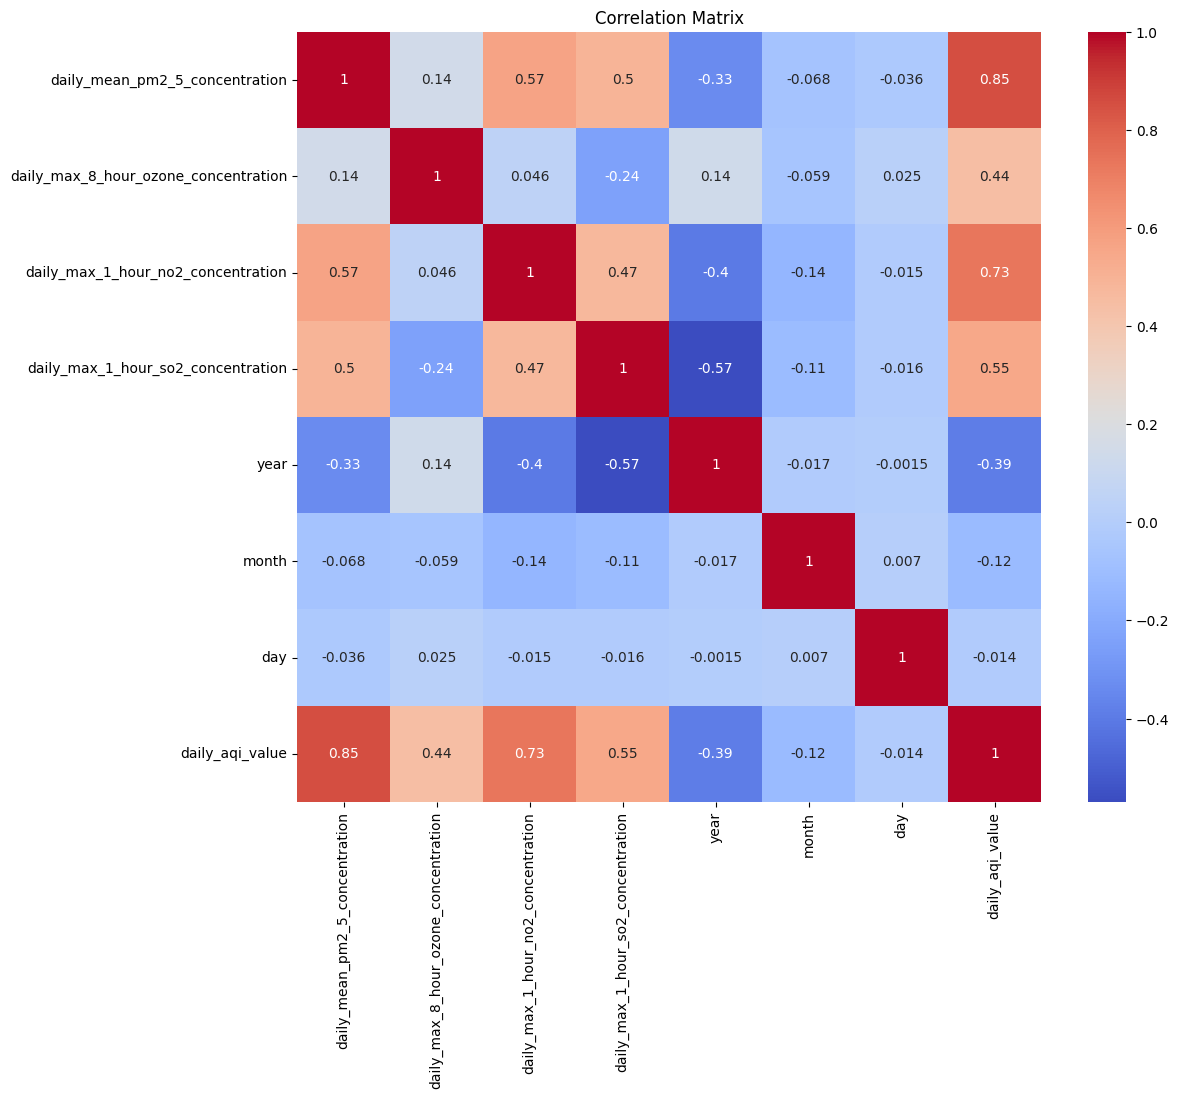

In [30]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), cmap="coolwarm", annot=True)
plt.title("Correlation Matrix")
plt.show()

In [31]:
# Count the number of values in the column that are less than 0
num_negative_values = len(df[df["daily_mean_pm2_5_concentration"] < 0])
print(f"There are {num_negative_values} values in the column that are less than 0.")

There are 5 values in the column that are less than 0.


In [32]:
# Count the number of values in the column that are less than 0
num_negative_values = len(df[df["daily_max_1_hour_so2_concentration"] < 0])
print(f"There are {num_negative_values} values in the column that are less than 0.")

There are 1 values in the column that are less than 0.


In [33]:
# Drop all the rows where the specified column has negative values
df = df[df['daily_mean_pm2_5_concentration'] >= 0]
df = df[df['daily_max_1_hour_so2_concentration'] >= 0]

In [34]:
df.isna().sum()

daily_mean_pm2_5_concentration          0
daily_max_8_hour_ozone_concentration    0
daily_max_1_hour_no2_concentration      0
daily_max_1_hour_so2_concentration      0
year                                    0
month                                   0
day                                     0
daily_aqi_value                         0
dtype: int64

In [35]:
df.head()

,daily_mean_pm2_5_concentration,daily_max_8_hour_ozone_concentration,daily_max_1_hour_no2_concentration,daily_max_1_hour_so2_concentration,year,month,day,daily_aqi_value
date,,,,,,,,
2001-07-15,5.50,0.04,38.00,5.00,2001,7,15,26.25
2001-07-16,11.00,0.04,58.00,8.00,2001,7,16,37.00
2001-07-18,21.80,0.06,41.00,6.00,2001,7,18,45.00
2001-07-18,21.60,0.06,41.00,6.00,2001,7,18,45.00
2001-07-19,12.40,0.04,35.00,5.00,2001,7,19,33.25


# Machine Learning Models
## Data preparation

In [36]:
# Split the data into traget variable y and features X
X = df.drop(["daily_aqi_value"], axis=1)
y = df["daily_aqi_value"]

# Random Forest Regressor with default hyperparameters

In [37]:
rf = RandomForestRegressor() # Create a random forest regression model 

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
# Fit the model to the training data
rf.fit(X_train, y_train)
    
# Predict on the test data
y_pred_rf = rf.predict(X_test)
    
# Calculate the metrics
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
    
# Evaluate the model using cross-validation
scores_rf = cross_val_score(rf, X_train, y_train, cv=5)

# Print results
print(f'Random Forest Regressor with Defualt Hyperparameters Results:')
print(f'Cross-validation Scores: {scores_rf}')
print(f'Mean Cross-validation Score: {np.mean(scores_rf)}')
print(f'R-squared Score: {r2_rf}')
print(f'Mean Squared Error: {mse_rf}')
print(f'Mean Absolute Error: {mae_rf}')

Random Forest Regressor with Defualt Hyperparameters Results:
Cross-validation Scores: [0.99210048 0.9940031  0.99302787 0.99310449 0.9859494 ]
Mean Cross-validation Score: 0.9916370658337683
R-squared Score: 0.9939341885532595
Mean Squared Error: 0.744505356366797
Mean Absolute Error: 0.43841373315949583


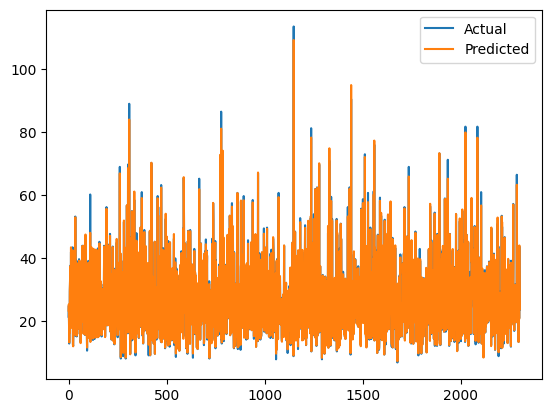

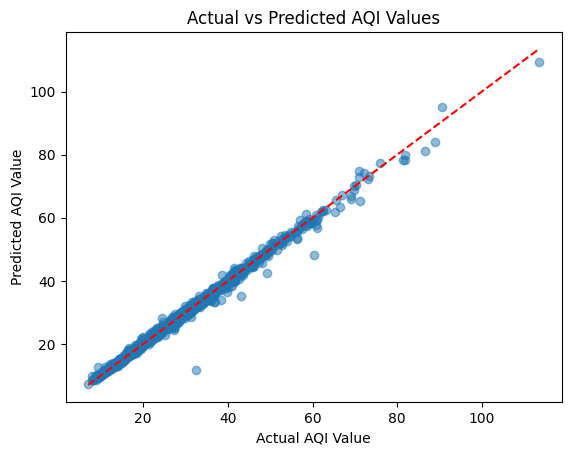

In [38]:
plt.plot(y_test.values, label="Actual")
plt.plot(y_pred_rf, label="Predicted")
plt.legend()
plt.show()



plt.scatter(y_test, y_pred_rf, alpha=0.5)
# Add labels and title
plt.xlabel("Actual AQI Value")
plt.ylabel("Predicted AQI Value")
plt.title("Actual vs Predicted AQI Values")

# Add a diagonal line for reference
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.show()

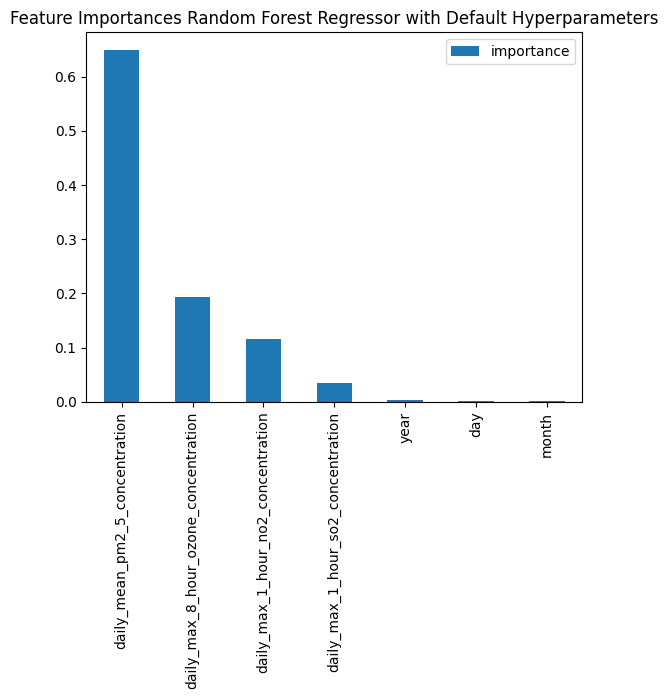

In [39]:
importances = rf.feature_importances_
feature_names = X.columns
feature_importances = pd.DataFrame(importances, index=feature_names, columns=['importance']).sort_values('importance', ascending=False)
feature_importances.plot(kind='bar')
plt.title('Feature Importances Random Forest Regressor with Default Hyperparameters')

plt.show()

## Test model

In [40]:
# Prepare a new dataset for the desired date
# We decided to check it on a data input in our dataset which had a daily aqi value of 26.25
new_data = pd.DataFrame({
    'daily_mean_pm2_5_concentration': [5.50],  
    'daily_max_8_hour_ozone_concentration': [0.04],
    'daily_max_1_hour_no2_concentration': [38],
    'daily_max_1_hour_so2_concentration': [5],
    'year': [2001],
    'month': [7],
    'day': [15]
})


In [41]:
# Make the prediction using the trained Random Forest Regressor with Default Hyperparameters
aqi_prediction = rf.predict(new_data)

print(f'The predicted AQI value is {aqi_prediction[0]:.2f}')

The predicted AQI value is 25.60


# Grid Search for best hyperparameters

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# Initialize the grid search model
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters:", grid_search.best_params_)

# Random Forest Regressor with Tuned Hyperparameters

In [42]:
rf = RandomForestRegressor(n_estimators=300,
                           max_depth=None,
                           min_samples_split=2,
                           min_samples_leaf=1,
                           max_features="auto",
                           random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
# Fit the model to the training data
rf.fit(X_train, y_train)
    
# Predict on the test data
y_pred_rf = rf.predict(X_test)
    
# Calculate the metrics
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
    
# Evaluate the model using cross-validation
scores_rf = cross_val_score(rf, X_train, y_train, cv=5)

# Print results
print(f'Random Forest Regressor with Tuned Hyperparameters Results:')
print(f'Cross-validation Scores: {scores_rf}')
print(f'Mean Cross-validation Score: {np.mean(scores_rf)}')
print(f'R-squared Score: {r2_rf}')
print(f'Mean Squared Error: {mse_rf}')
print(f'Mean Absolute Error: {mae_rf}')

Random Forest Regressor with Tuned Hyperparameters Results:
Cross-validation Scores: [0.99250726 0.9942053  0.99313097 0.99328512 0.98628824]
Mean Cross-validation Score: 0.9918833769312313
R-squared Score: 0.9939845458563641
Mean Squared Error: 0.7383246034332899
Mean Absolute Error: 0.43906127770534553


### Visualise the results

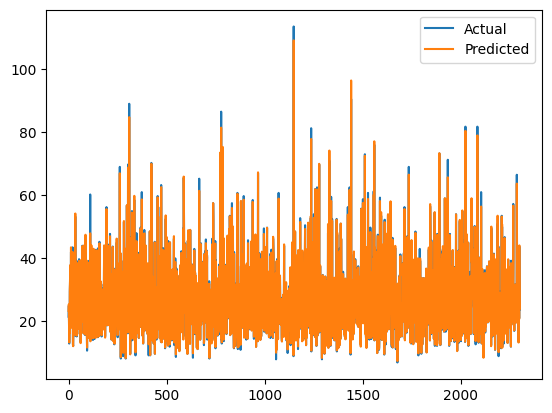

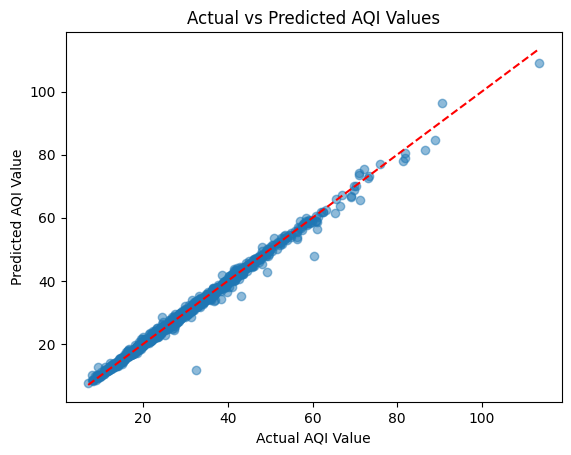

In [43]:
plt.plot(y_test.values, label="Actual")
plt.plot(y_pred_rf, label="Predicted")
plt.legend()
plt.show()



plt.scatter(y_test, y_pred_rf, alpha=0.5)
# Add labels and title
plt.xlabel("Actual AQI Value")
plt.ylabel("Predicted AQI Value")
plt.title("Actual vs Predicted AQI Values")

# Add a diagonal line for reference
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.show()

### Feature Importances Random Forest Regressor with Tuned Hyperparameters

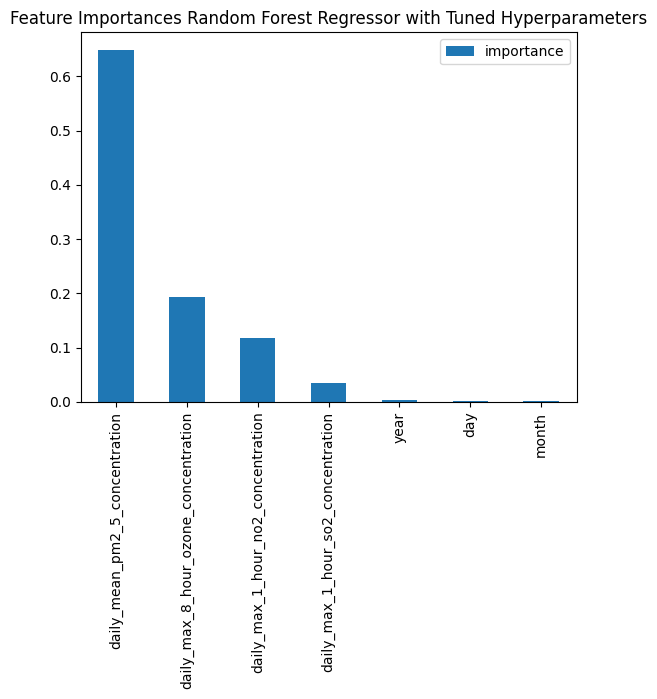

In [44]:
importances = rf.feature_importances_
feature_names = X.columns
feature_importances = pd.DataFrame(importances, index=feature_names, columns=['importance']).sort_values('importance', ascending=False)
feature_importances.plot(kind='bar')
plt.title('Feature Importances Random Forest Regressor with Tuned Hyperparameters')

plt.show()

 ## Test the model on manual inputs

In [54]:
# Make the prediction using the trained Random Forest Regressor with Tuned Hyperparameters
aqi_prediction = rf.predict(new_data)

print(f'The predicted AQI value is {aqi_prediction[0]:.2f}')

The predicted AQI value is 25.59


# KNeighbors Regressor with default hyperparameters

In [46]:
# Initialize the KNN Regressor with 5 neighbors
knn = KNeighborsRegressor(n_neighbors=5)

# Fit the model to the training data
knn.fit(X_train, y_train)

# Predict on the test data
y_pred_knn = knn.predict(X_test)

# Calculate R-squared, MSE, and MAE
r2_knn = r2_score(y_test, y_pred_knn)
mse_knn = mean_squared_error(y_test, y_pred_knn)
mae_knn = mean_absolute_error(y_test, y_pred_knn)

# Evaluate the model using cross-validation
scores_knn = cross_val_score(knn, X_train, y_train, cv=5)

# Print results
print(f'KNN Regressor Results:')
print(f'Cross-validation Scores: {scores_knn}')
print(f'Mean Cross-validation Score: {np.mean(scores_knn)}')
print(f'R-squared Score: {r2_knn}')
print(f'Mean Squared Error: {mse_knn}')
print(f'Mean Absolute Error: {mae_knn}')

KNN Regressor Results:
Cross-validation Scores: [0.8691631  0.88877112 0.8884312  0.86311086 0.88464361]
Mean Cross-validation Score: 0.8788239797343078
R-squared Score: 0.8970165039574074
Mean Squared Error: 12.639984789222076
Mean Absolute Error: 2.3076923076923075


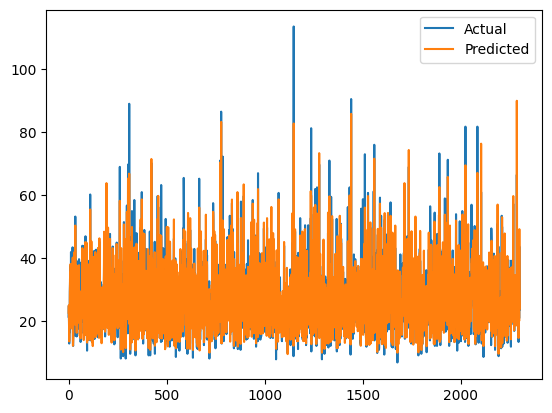

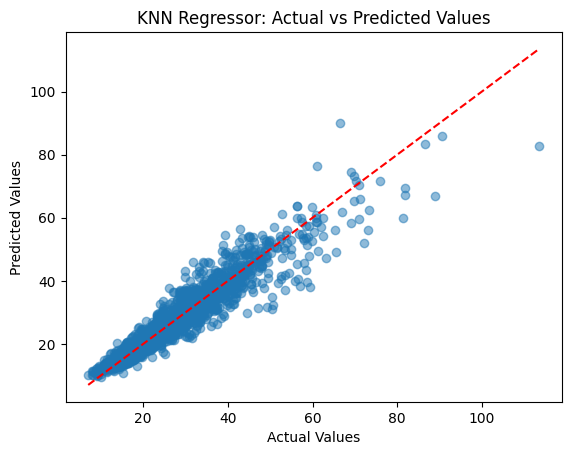

In [47]:
plt.plot(y_test.values, label="Actual")
plt.plot(y_pred_knn, label="Predicted")
plt.legend()
plt.show()


plt.scatter(y_test, y_pred_knn, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("KNN Regressor: Actual vs Predicted Values")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

# Test model

In [48]:
# Make the prediction using the trained KNeighbors Regressor with default hyperparameters
aqi_prediction = knn.predict(new_data)

print(f'The predicted AQI value is {aqi_prediction[0]:.2f}')


The predicted AQI value is 22.75


# Decision Tree Regressor with default hyperparameters

In [49]:

# Initialize the Decision Tree Regressor
dtr = DecisionTreeRegressor()

# Fit the model to the training data
dtr.fit(X_train, y_train)

# Predict on the test data
y_pred_dtr = dtr.predict(X_test)

# Calculate R-squared, MSE, and MAE
r2_dtr = r2_score(y_test, y_pred_dtr)
mse_dtr = mean_squared_error(y_test, y_pred_dtr)
mae_dtr = mean_absolute_error(y_test, y_pred_dtr)

# Evaluate the model using cross-validation
scores_dtr = cross_val_score(dtr, X_train, y_train, cv=5)

# Print results
print(f'Decision Tree Regressor Results:')
print(f'Cross-validation Scores: {scores_dtr}')
print(f'Mean Cross-validation Score: {np.mean(scores_dtr)}')
print(f'R-squared Score: {r2_dtr}')
print(f'Mean Squared Error: {mse_dtr}')
print(f'Mean Absolute Error: {mae_dtr}')


Decision Tree Regressor Results:
Cross-validation Scores: [0.97842104 0.97813183 0.9795967  0.97812074 0.96864222]
Mean Cross-validation Score: 0.976582505885905
R-squared Score: 0.9812072926973717
Mean Squared Error: 2.306578661451543
Mean Absolute Error: 0.8729900043459365


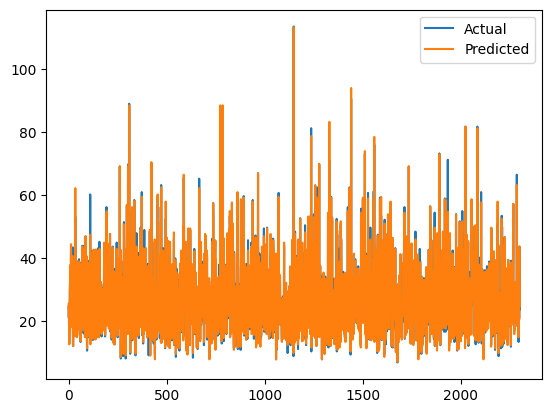

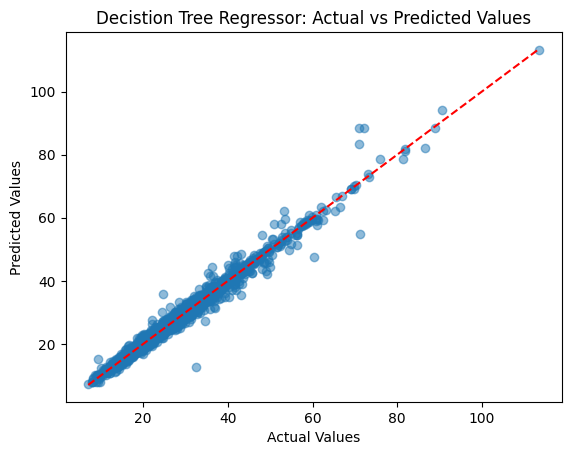

In [50]:
plt.plot(y_test.values, label="Actual")
plt.plot(y_pred_dtr, label="Predicted")
plt.legend()
plt.show()


plt.scatter(y_test, y_pred_dtr, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Decistion Tree Regressor: Actual vs Predicted Values")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

In [51]:
# Make the prediction using the trained Decision Tree Regressor with default hyperparameters
aqi_prediction = dtr.predict(new_data)

print(f'The predicted AQI value is {aqi_prediction[0]:.2f}')


The predicted AQI value is 24.50


## Feature importance

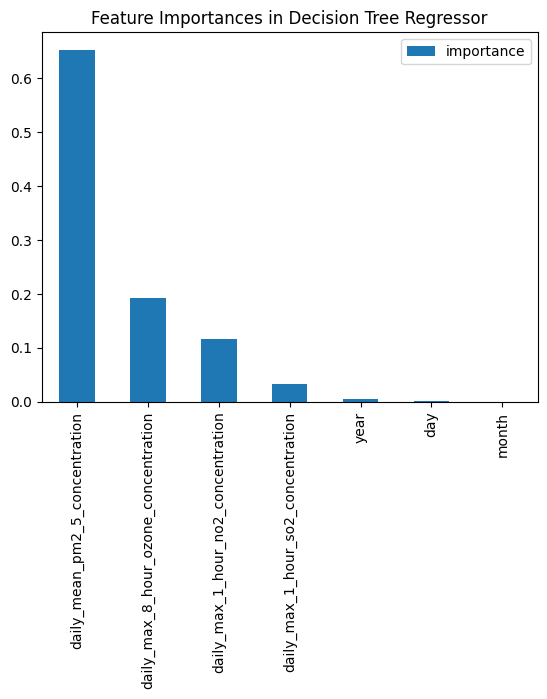

In [52]:
importances = dtr.feature_importances_
feature_names = X.columns
feature_importances = pd.DataFrame(importances, index=feature_names, columns=['importance']).sort_values('importance', ascending=False)
feature_importances.plot(kind='bar')
plt.title('Feature Importances in Decision Tree Regressor')
plt.show()